# link Kaggle :
 https://www.kaggle.com/competitions/spaceship-titanic/data?select=sample_submission.csv

# import essential library

In [470]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')
from collections import Counter
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,10)
from sklearn.model_selection import train_test_split
import tensorflow as tfa

# load data set

In [471]:
# train.csv
link_train = 'https://drive.google.com/uc?id=1zcgR30DTz1AwNJ1Y_4uh6cfnOVB96yYt'
df_trainSet= pd.read_csv(link_train)
df_trainSet

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [472]:
# test.csv
link_Xtest = 'https://drive.google.com/uc?id=1ffxmI-6HkupmkFm5CbTwYudbFeOJ_MpK'
df_X_testSet= pd.read_csv(link_Xtest)
df_X_testSet

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [532]:
# sample_submission.csv
link_ytest = 'https://drive.google.com/uc?id=1s2GcUgV05_S0T0zQyWAcjSEyX6usORYT'
df_ytestSet= pd.read_csv(link_ytest)
df_ytestSet

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


## extract some information and check missing values (trainSet)

In [473]:
df_trainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [474]:
df_trainSet.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [475]:
df_trainSet.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


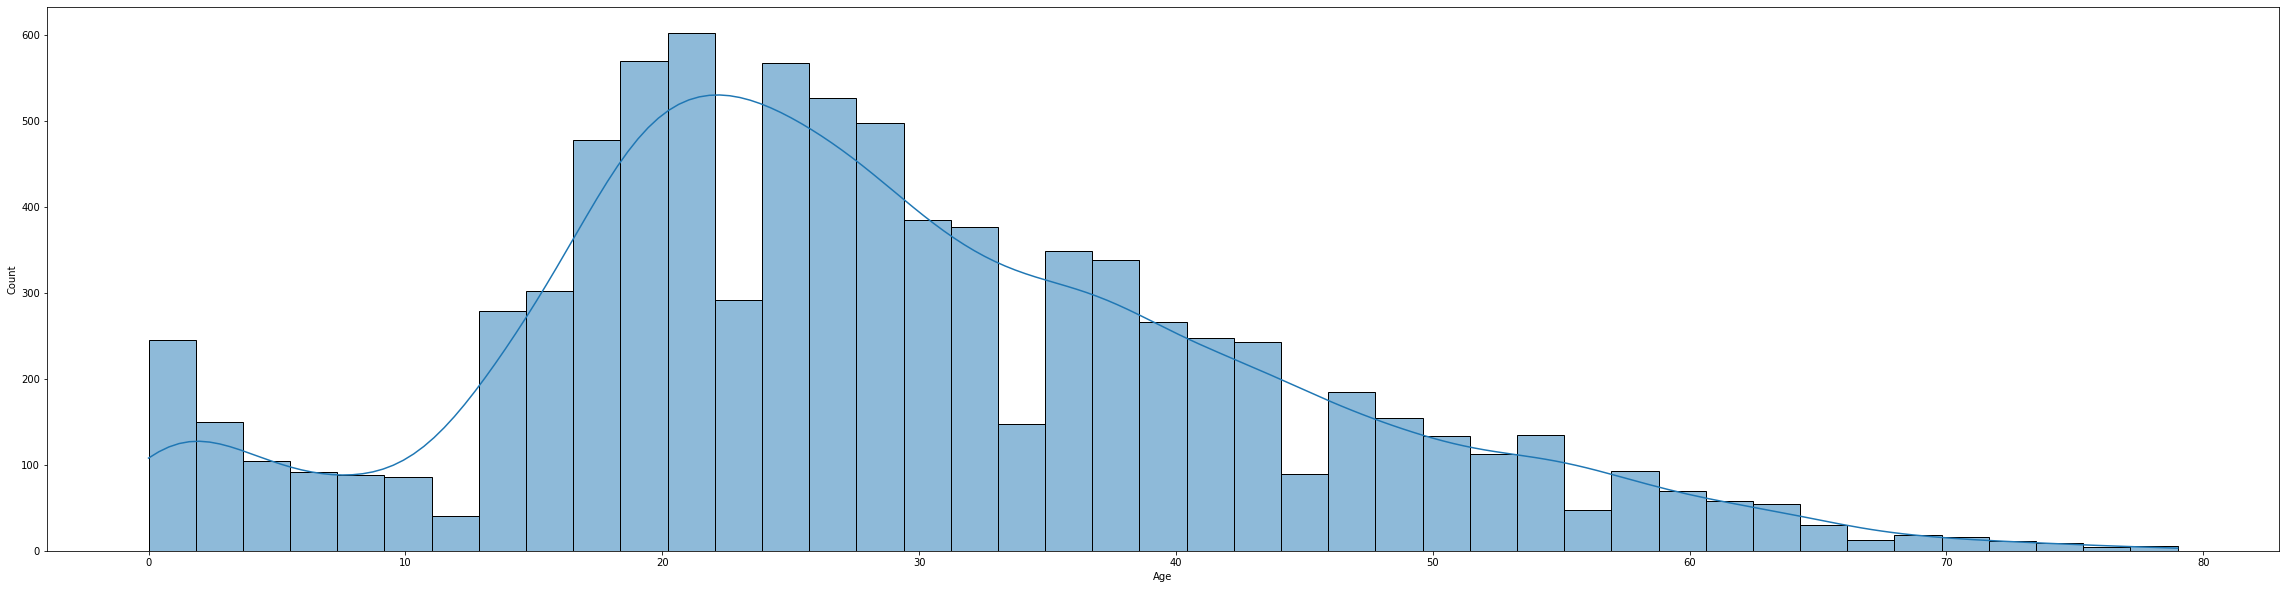

In [476]:
sns.histplot(df_trainSet.Age,kde=True)

## extract some information and check missing values (X_testSet)

In [477]:
df_X_testSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [478]:
df_X_testSet.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [479]:
df_X_testSet.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


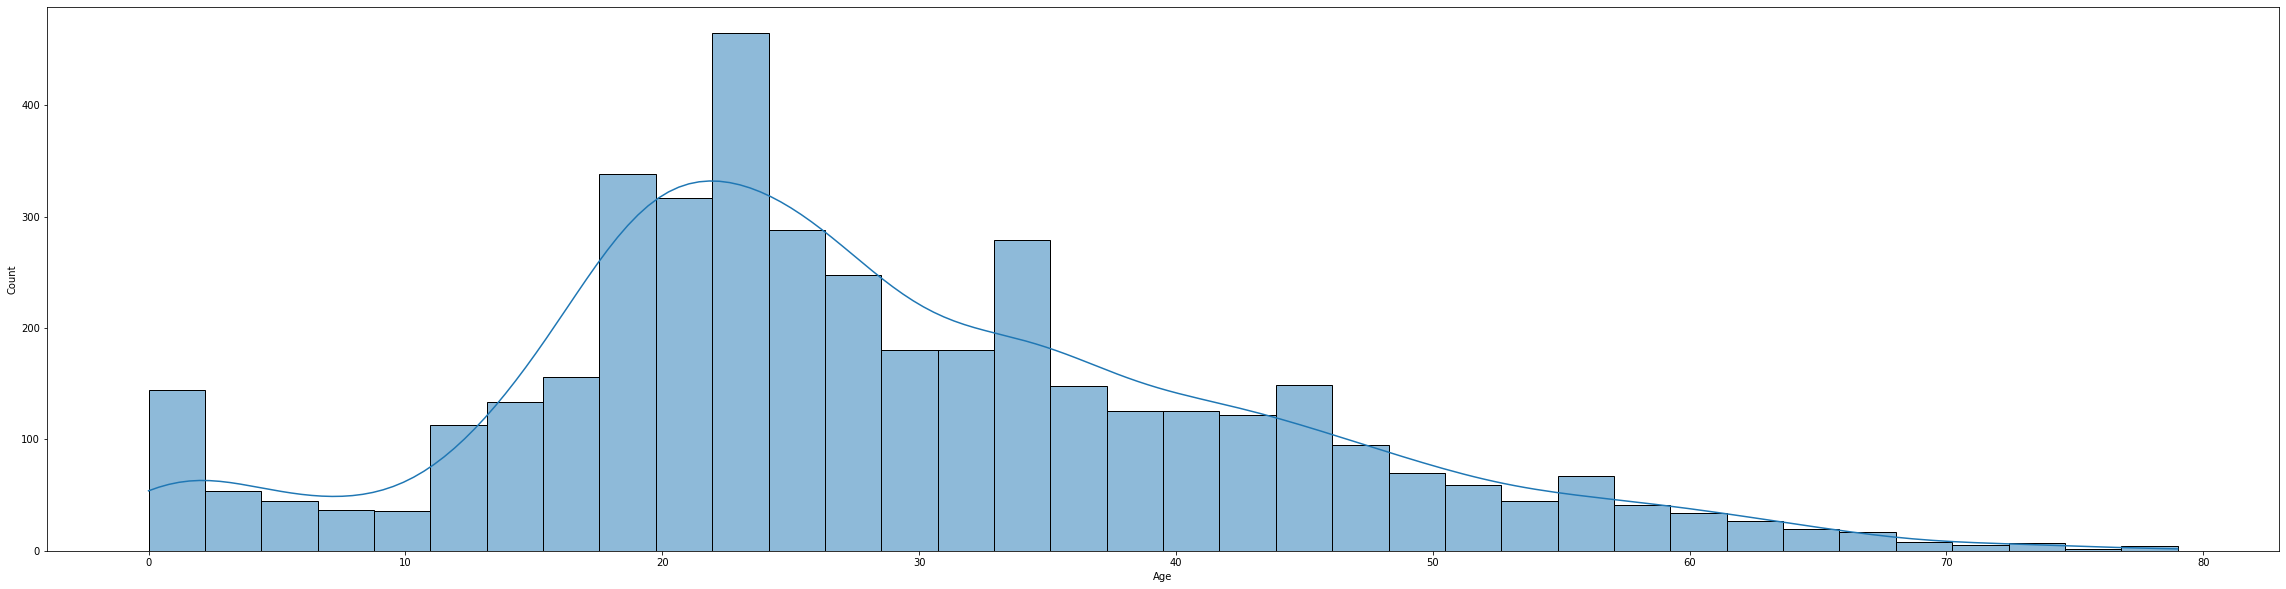

In [480]:
sns.histplot(df_X_testSet.Age,kde=True)

# Data cleaning (trainSet)

1-check columns name

In [481]:
df_trainSet.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

2- handling missing values

In [482]:
from collections import Counter
Counter(df_trainSet["HomePlanet"])

Counter({'Europa': 2131, 'Earth': 4602, 'Mars': 1759, nan: 201})

In [483]:
df_trainSet_fillNan = pd.DataFrame()
df_trainSet_fillNan = df_trainSet.fillna(df_trainSet.mode().iloc[0])

In [484]:
Counter(df_trainSet_fillNan["HomePlanet"])

Counter({'Europa': 2131, 'Earth': 4803, 'Mars': 1759})

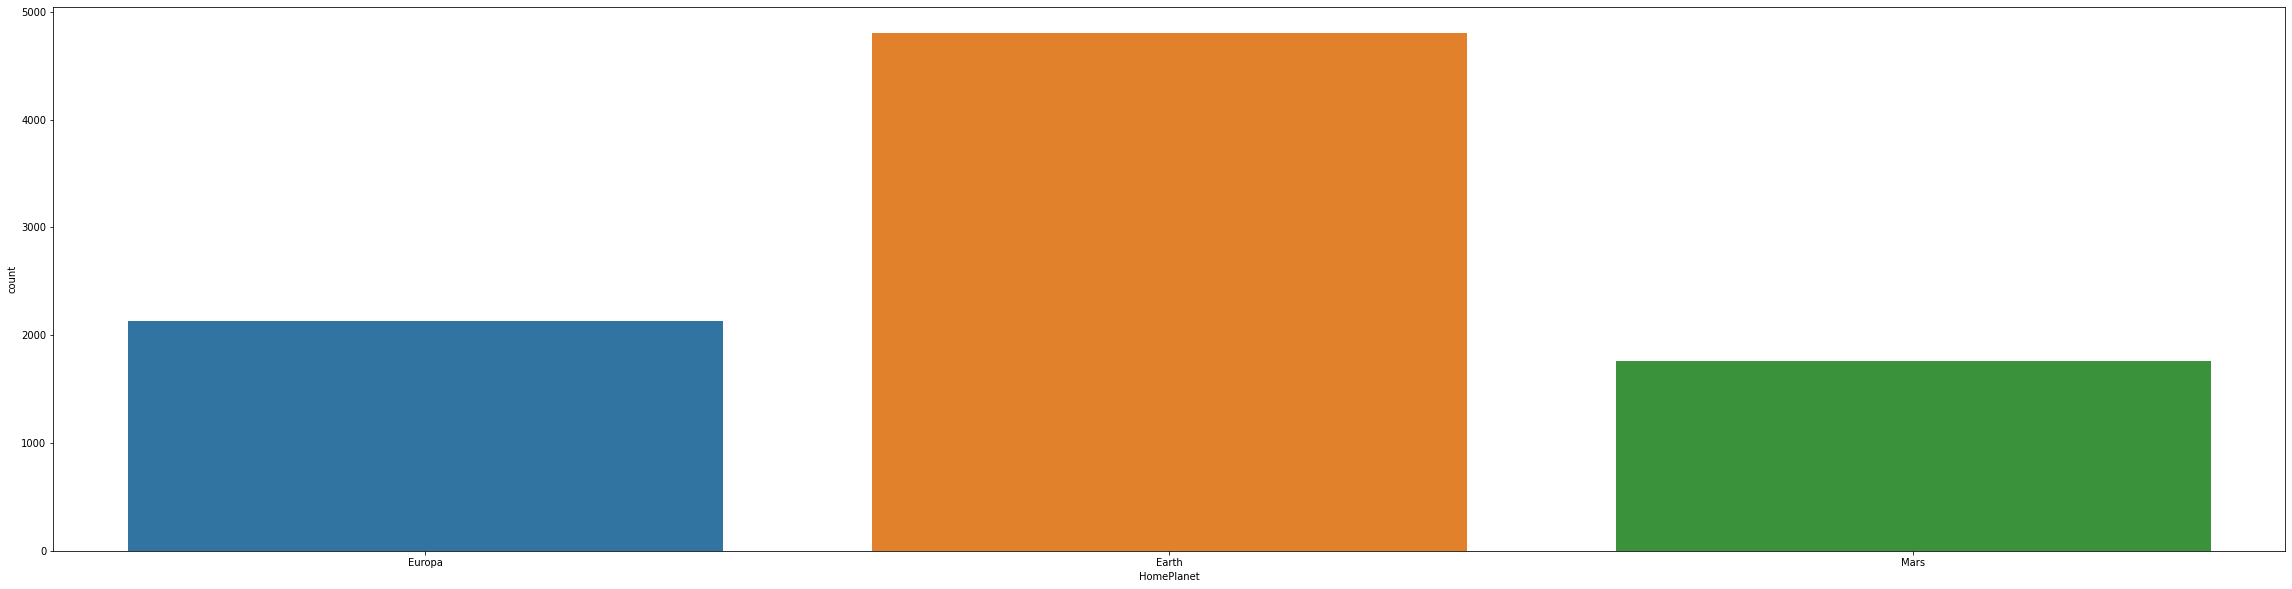

In [485]:
sns.countplot(df_trainSet_fillNan["HomePlanet"])

In [486]:
df_trainSet_fillNan.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

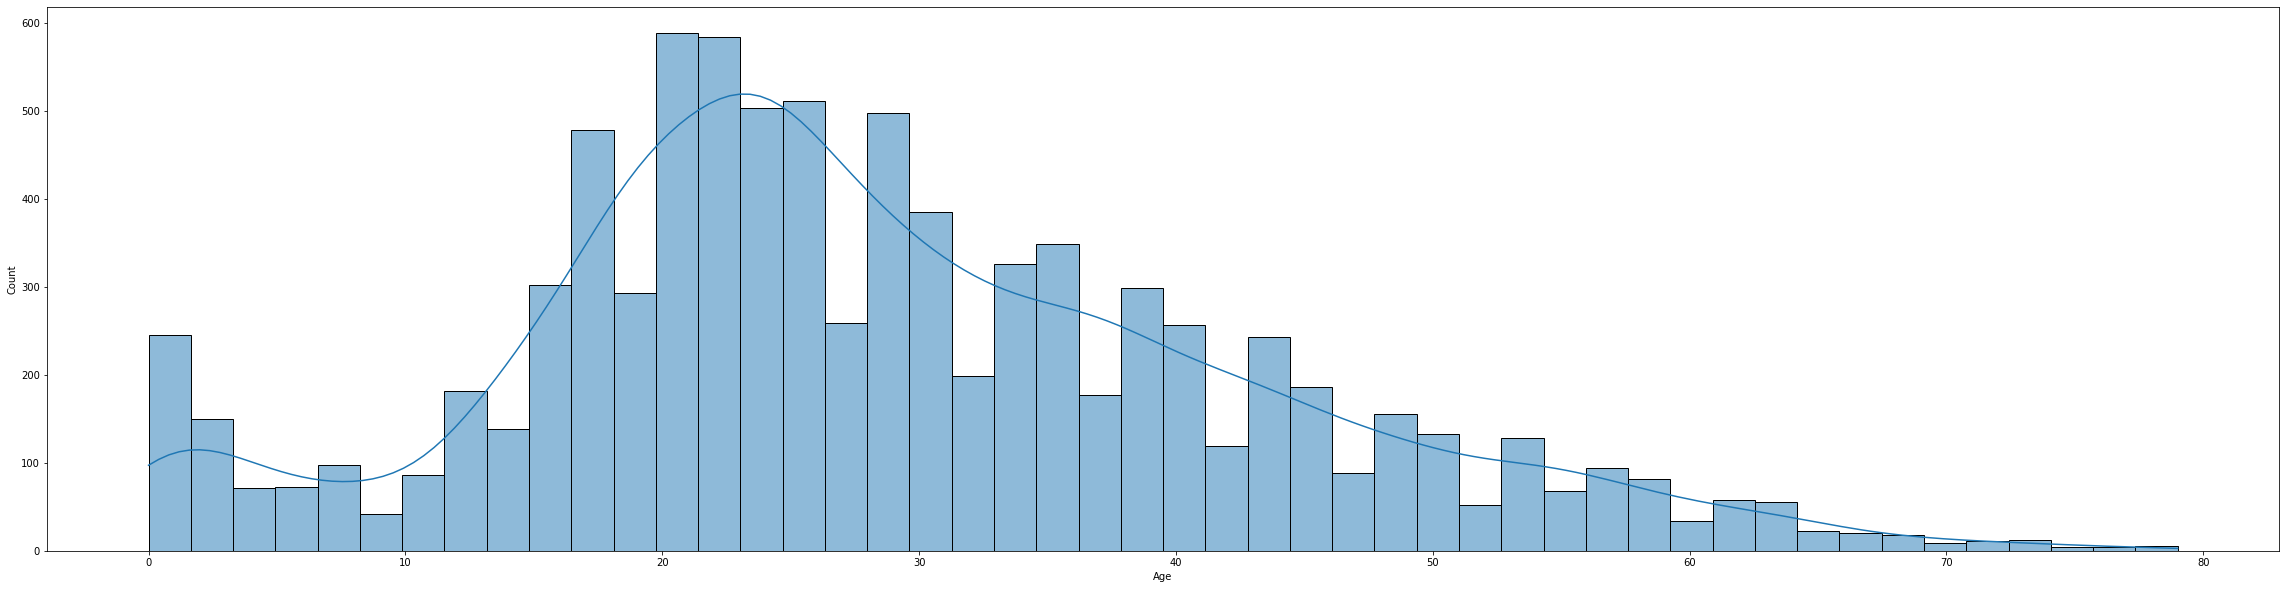

In [487]:
sns.histplot(df_trainSet_fillNan.Age,kde=True)

# Data cleaning (df_X_testSet)

1-check columns name

In [488]:
df_X_testSet.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

2- handling missing values

In [489]:
from collections import Counter
Counter(df_X_testSet["HomePlanet"])

Counter({'Earth': 2263, 'Europa': 1002, 'Mars': 925, nan: 87})

In [490]:
df_X_testSet_fillNan = pd.DataFrame()
df_X_testSet_fillNan = df_X_testSet.fillna(df_X_testSet.mode().iloc[0])

In [491]:
Counter(df_X_testSet_fillNan["HomePlanet"])

Counter({'Earth': 2350, 'Europa': 1002, 'Mars': 925})

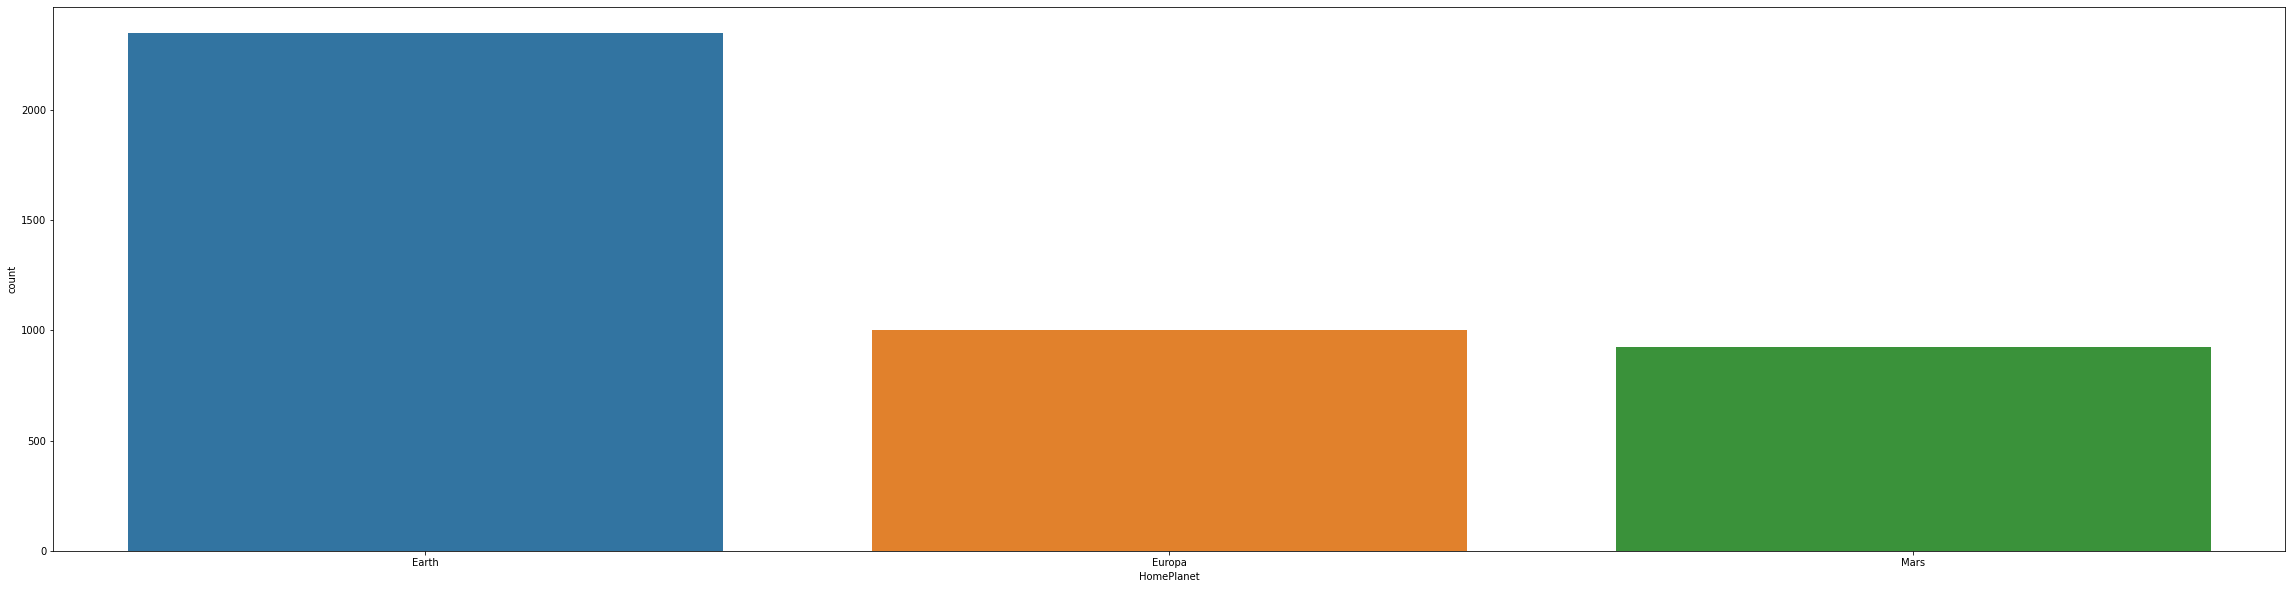

In [492]:
sns.countplot(df_X_testSet_fillNan["HomePlanet"])

In [493]:
df_X_testSet_fillNan.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

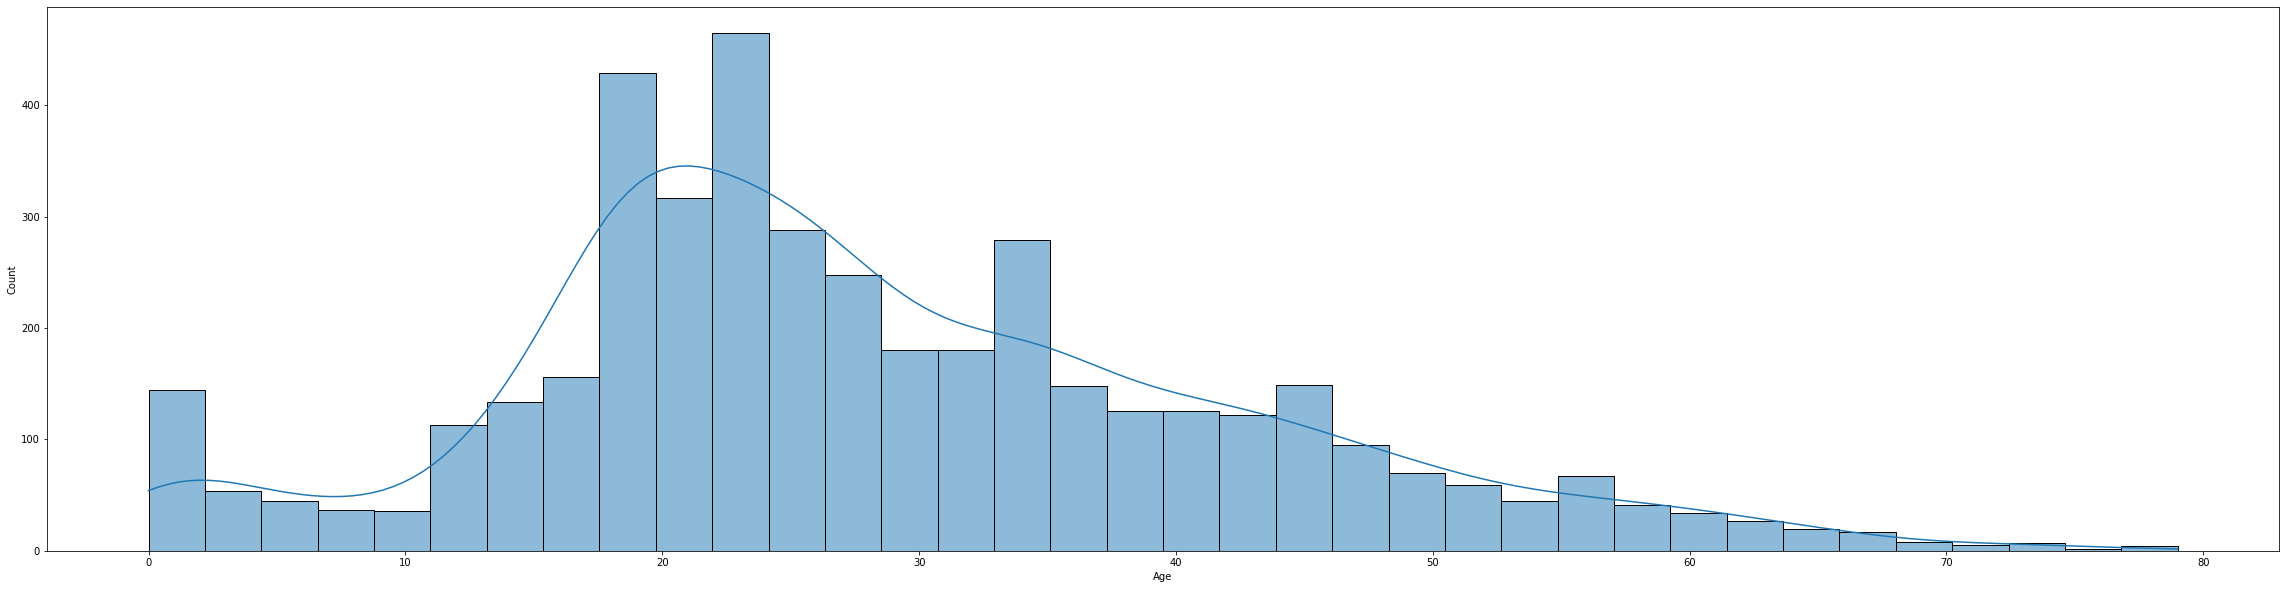

In [494]:
sns.histplot(df_X_testSet_fillNan.Age,kde=True)

# EDA visualization

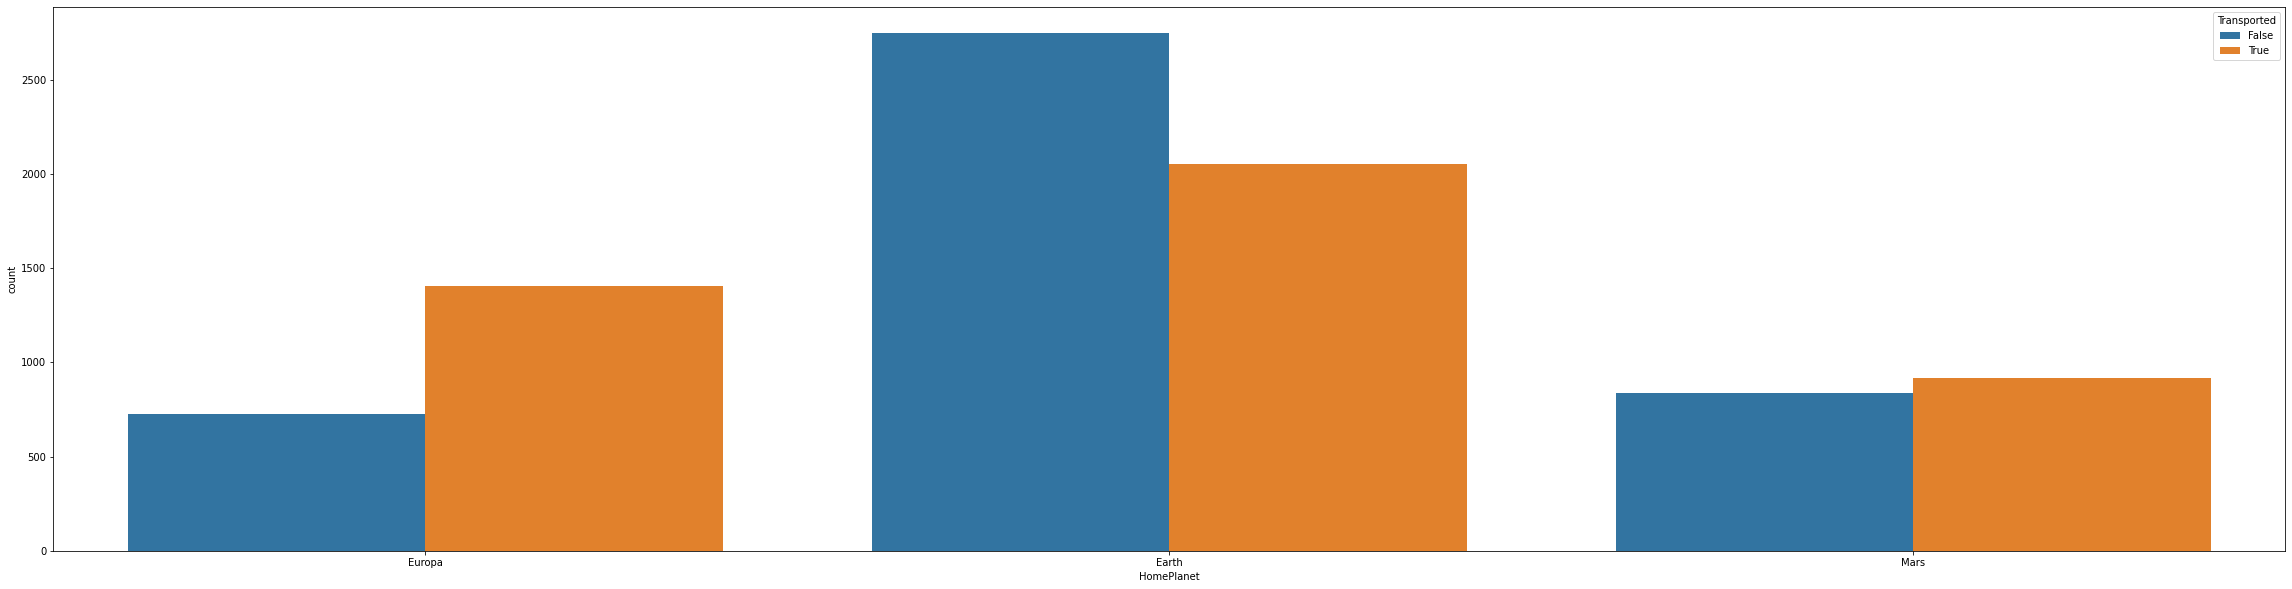

In [495]:
sns.countplot(df_trainSet_fillNan.HomePlanet,hue='Transported',data=df_trainSet_fillNan)

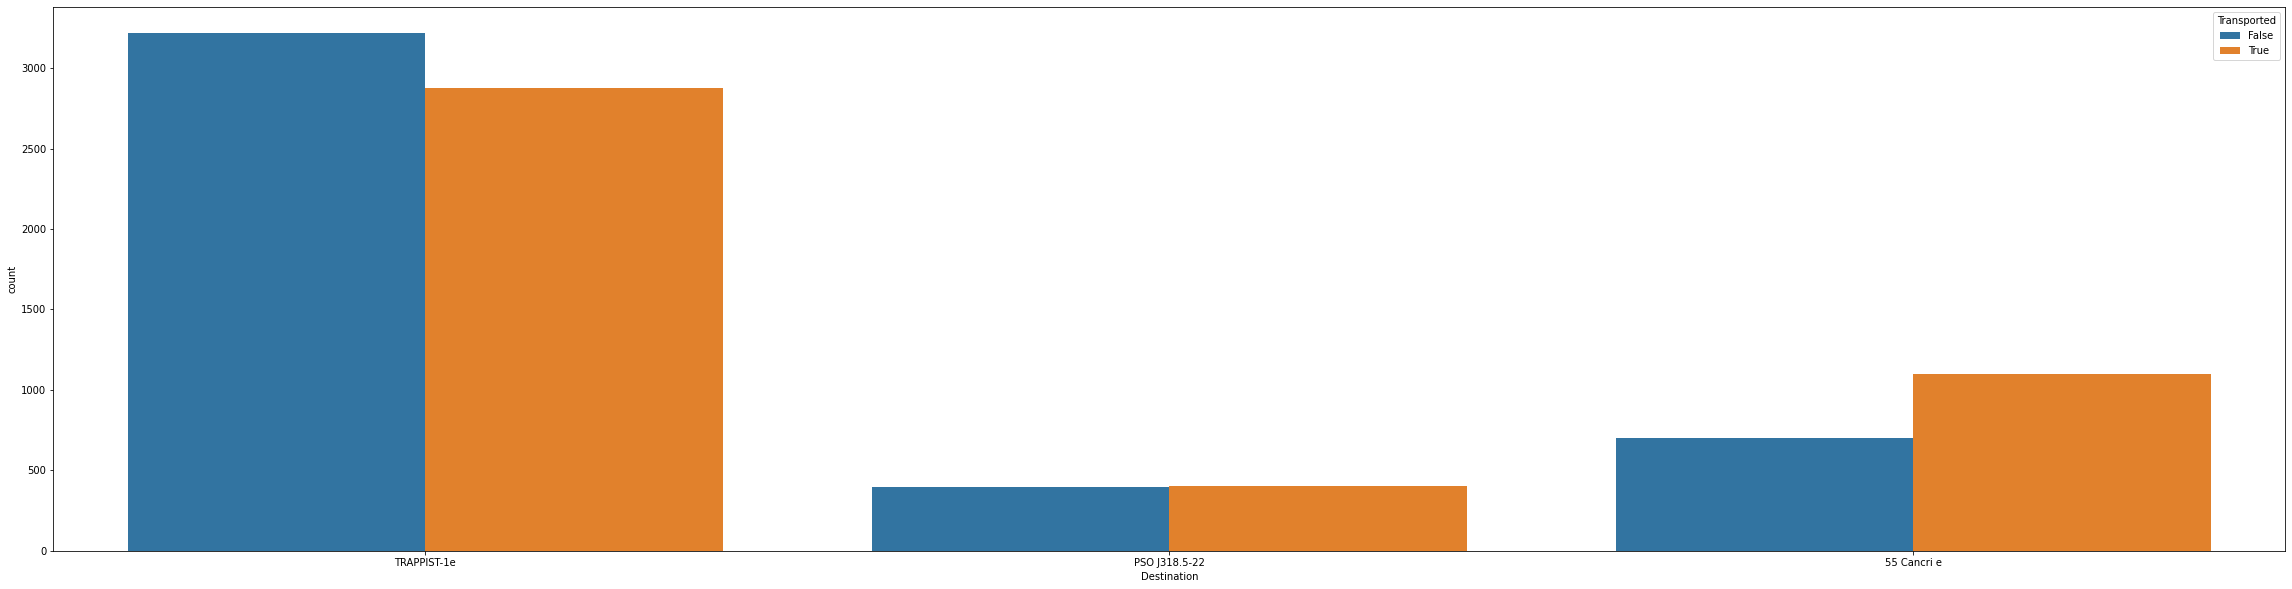

In [496]:
sns.countplot(df_trainSet_fillNan.Destination,hue='Transported',data=df_trainSet_fillNan)

In [497]:
df_trainSet_fillNan.Transported.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

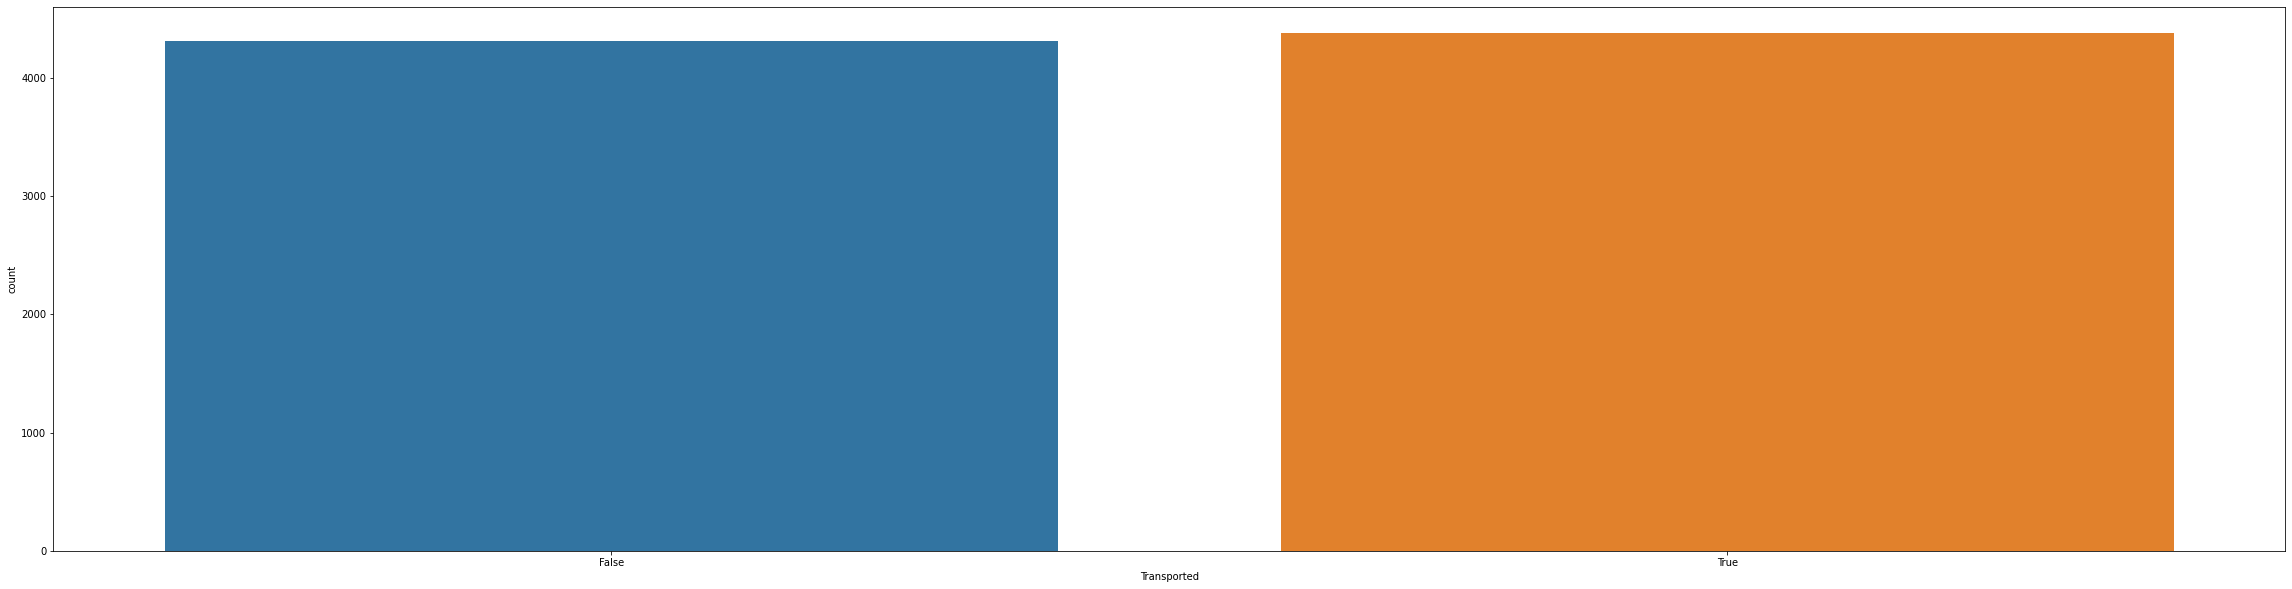

In [498]:
sns.countplot(df_trainSet_fillNan.Transported)

In [499]:
Transported=df_trainSet_fillNan[df_trainSet_fillNan.Transported==True]

In [500]:
Transported

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,Candra Jacostaffey,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8684,9274_01,Earth,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True
8685,9275_01,Europa,False,A/97/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Polaton Conable,True
8687,9275_03,Europa,False,A/97/P,TRAPPIST-1e,30.0,False,0.0,3208.0,0.0,2.0,330.0,Atlasym Conable,True
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


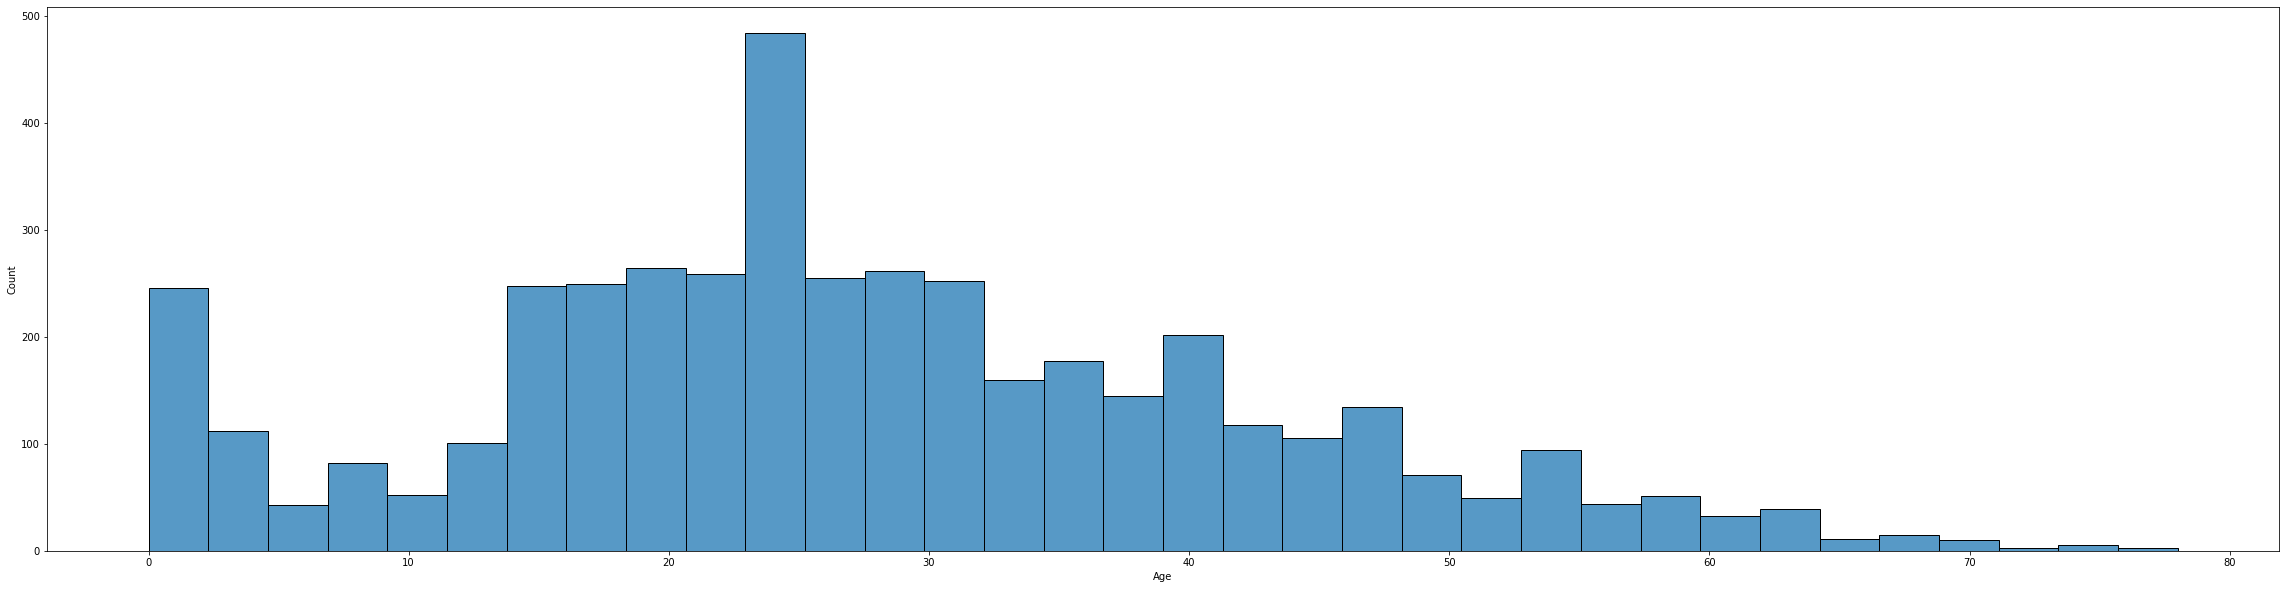

In [501]:
sns.histplot(Transported.Age)

In [502]:
non_Transported =df_trainSet_fillNan[df_trainSet_fillNan.Transported==False]

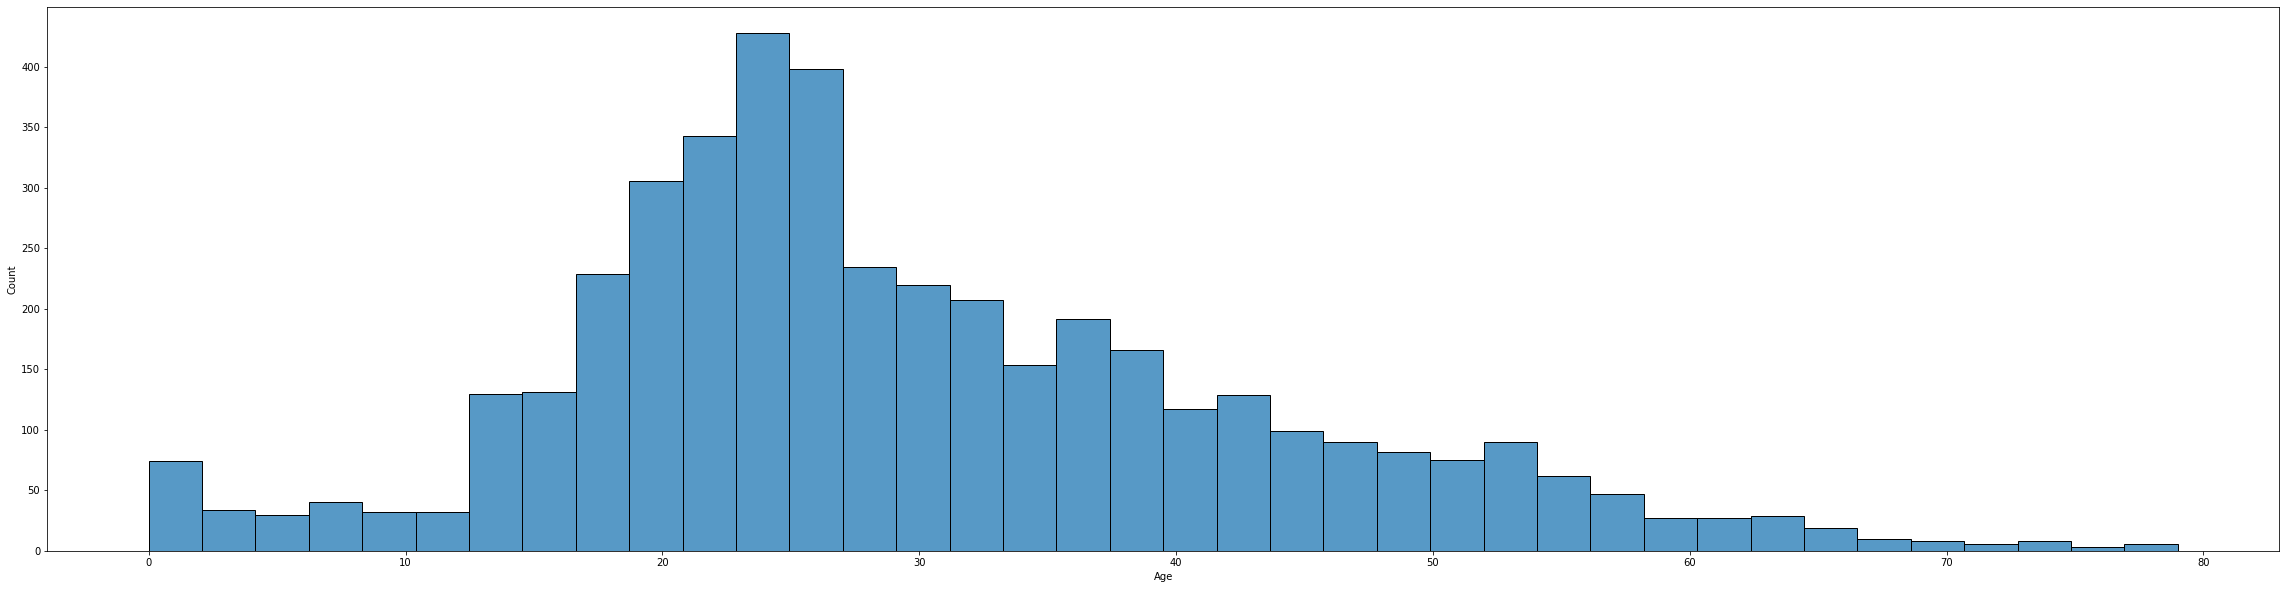

In [503]:
sns.histplot(non_Transported.Age)

# feature Engineering and feature selection

In [504]:
df_trainSet_fillNan [['PassengerId','GroupPassengerId']] = df_trainSet_fillNan.PassengerId.str.split("_", expand=True)
df_trainSet_fillNan

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupPassengerId
0,0001,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,01
1,0002,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,01
2,0003,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,01
3,0003,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,02
4,0004,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,01
8689,9278,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,01
8690,9279,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,01
8691,9280,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,01


In [505]:
df_trainSet_fillNan.drop(['Cabin','Name'],inplace=True,axis=1)
df_trainSet_fillNan.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupPassengerId
0,0001,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,01
1,0002,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,01
2,0003,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,01
3,0003,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,02
4,0004,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,01


In [506]:
df_X_testSet_fillNan [['PassengerId','GroupPassengerId']] = df_X_testSet_fillNan.PassengerId.str.split("_", expand=True)
df_X_testSet_fillNan

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupPassengerId
0,0013,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,01
1,0018,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,01
2,0019,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,01
3,0021,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,01
4,0023,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,02
4273,9269,Earth,False,G/160/P,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,01
4274,9271,Mars,True,D/296/P,55 Cancri e,18.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,01
4275,9273,Europa,False,D/297/P,TRAPPIST-1e,18.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,01


In [507]:
df_X_testSet_fillNan.drop(['Cabin','Name'],inplace=True,axis=1)
df_X_testSet_fillNan.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupPassengerId
0,0013,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,01
1,0018,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,01
2,0019,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,01
3,0021,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,01
4,0023,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,01


# data preprocessing (trainSet)

In [508]:
df_trainSet_fillNan.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupPassengerId
0,0001,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,01
1,0002,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,01
2,0003,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,01
3,0003,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,02
4,0004,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,01


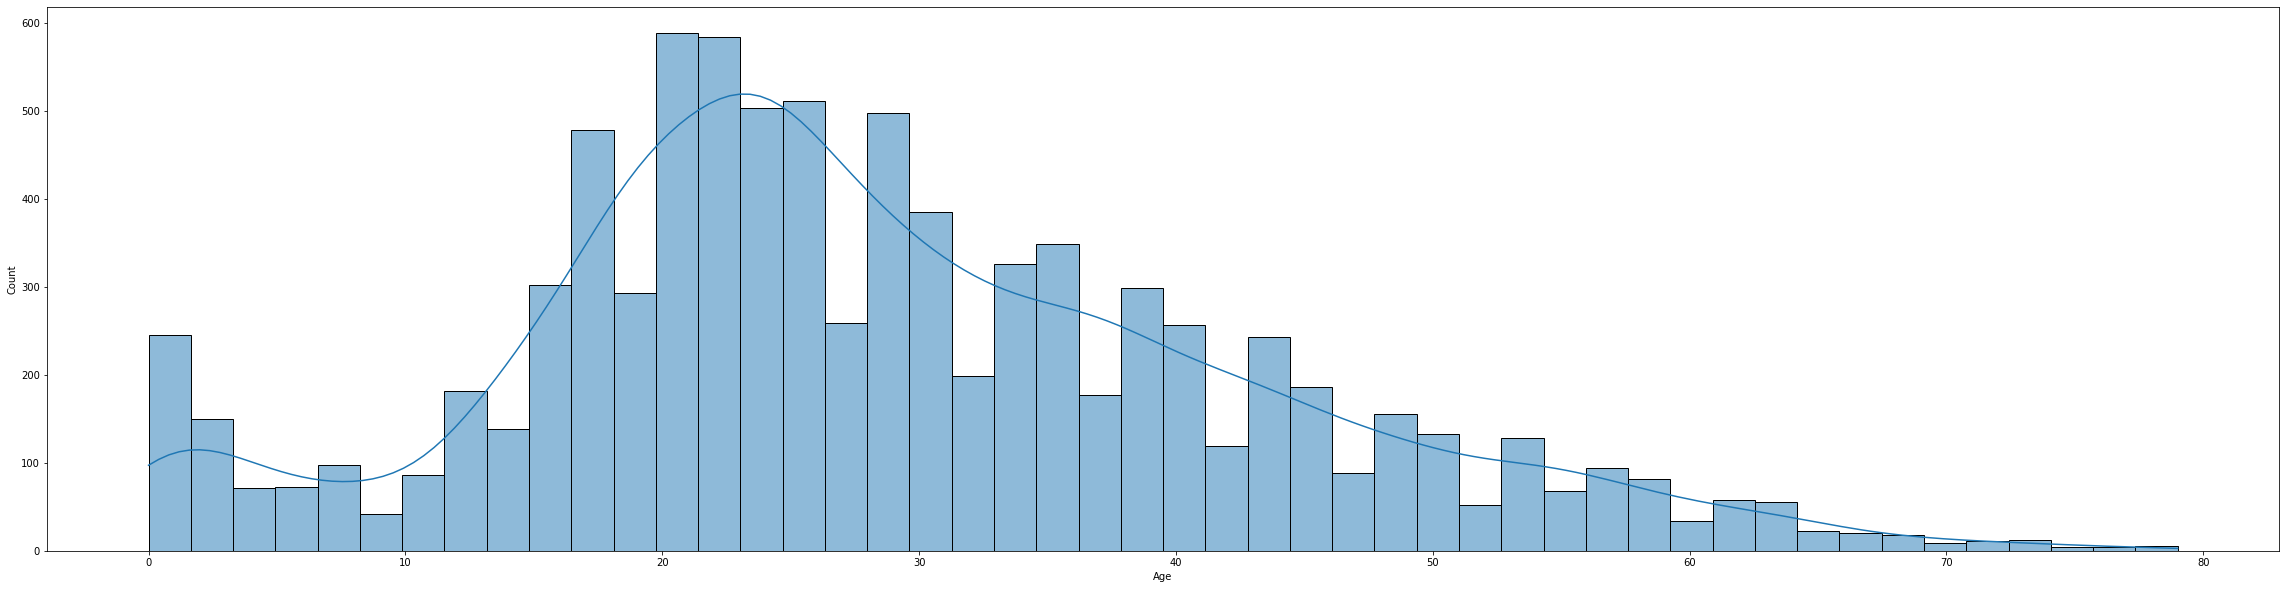

In [509]:
sns.histplot(df_trainSet_fillNan.Age,kde=True)

In [510]:
# Categorizing Age into 4 Categories
# Baby/Toddler: (0,3], 0 is excluded & 3 is included
# Child: (3,17], 3 is excluded & 17 is included
# Adult: (17,63], 17 is excluded & 63 is included
# Elderly: (63,99], 63 is excluded & 99 is included
df_trainSet_fillNan['Age'] = pd.cut(x=df_trainSet_fillNan['Age'], bins=[0, 3, 17, 63, 99],
                     labels=['Baby/Toddler', 'Child', 'Adult',
                             'Elderly'])
df_trainSet_fillNan

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupPassengerId
0,0001,Europa,False,TRAPPIST-1e,Adult,False,0.0,0.0,0.0,0.0,0.0,False,01
1,0002,Earth,False,TRAPPIST-1e,Adult,False,109.0,9.0,25.0,549.0,44.0,True,01
2,0003,Europa,False,TRAPPIST-1e,Adult,True,43.0,3576.0,0.0,6715.0,49.0,False,01
3,0003,Europa,False,TRAPPIST-1e,Adult,False,0.0,1283.0,371.0,3329.0,193.0,False,02
4,0004,Earth,False,TRAPPIST-1e,Child,False,303.0,70.0,151.0,565.0,2.0,True,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,Europa,False,55 Cancri e,Adult,True,0.0,6819.0,0.0,1643.0,74.0,False,01
8689,9278,Earth,True,PSO J318.5-22,Adult,False,0.0,0.0,0.0,0.0,0.0,False,01
8690,9279,Earth,False,TRAPPIST-1e,Adult,False,0.0,0.0,1872.0,1.0,0.0,True,01
8691,9280,Europa,False,55 Cancri e,Adult,False,0.0,1049.0,0.0,353.0,3235.0,False,01


In [511]:
df_trainSet_fillNan.Age = df_trainSet_fillNan.Age.fillna(df_trainSet_fillNan.Age.mode().iloc[0])
df_trainSet_fillNan.Age.isna().sum()

0

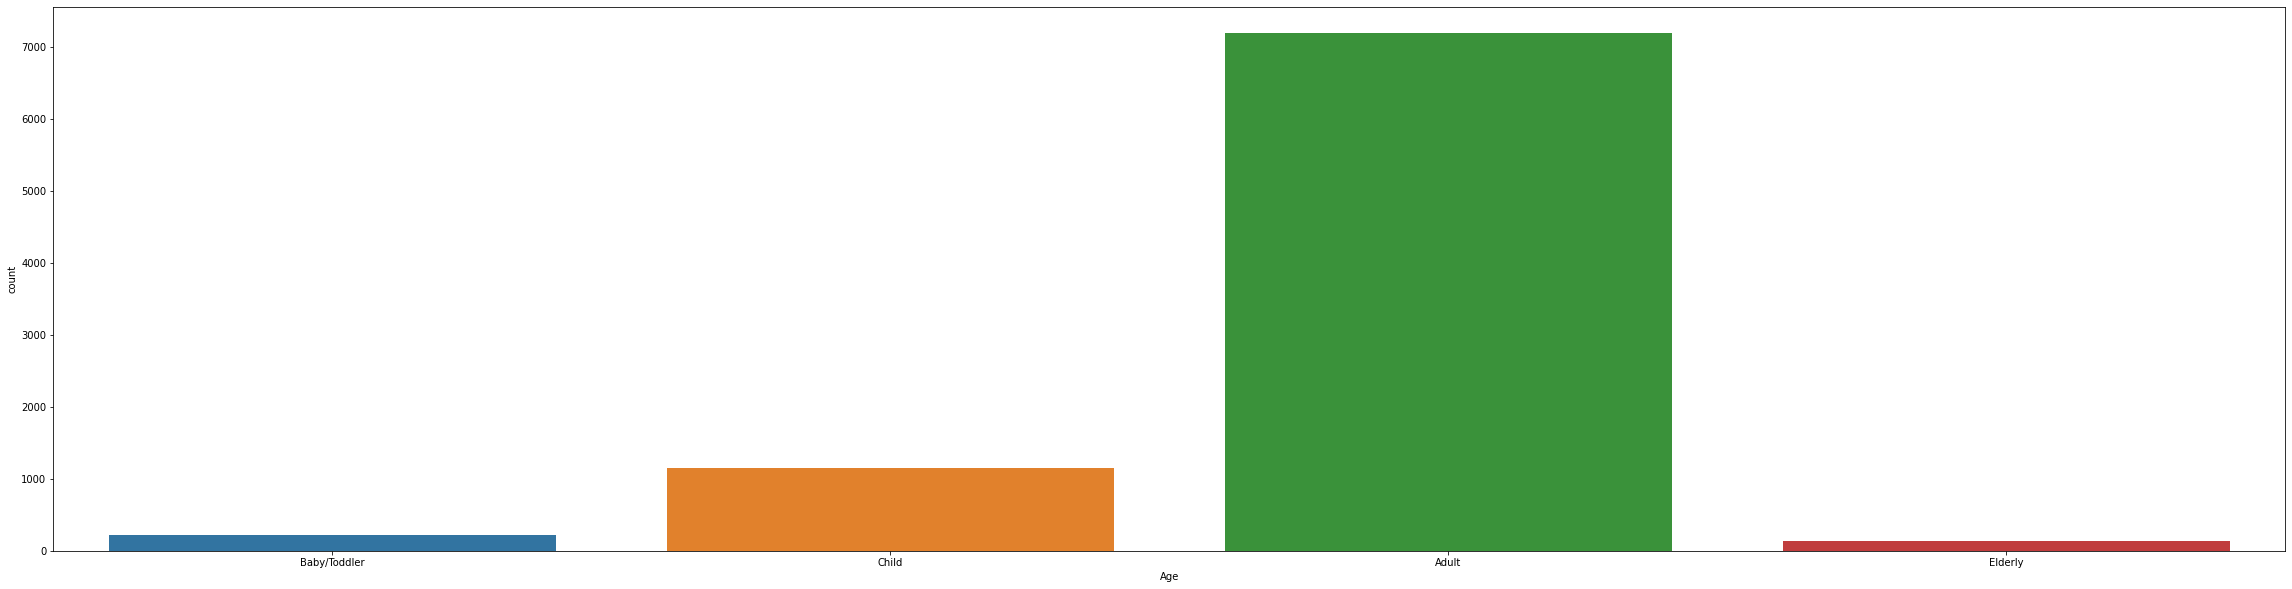

In [512]:
sns.countplot(df_trainSet_fillNan['Age'])

In [513]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_trainSet_fillNan['HomePlanet'] = le.fit_transform(df_trainSet_fillNan['HomePlanet'])
df_trainSet_fillNan['CryoSleep'] = le.fit_transform(df_trainSet_fillNan['CryoSleep'])
df_trainSet_fillNan['Destination'] = le.fit_transform(df_trainSet_fillNan['Destination'])
df_trainSet_fillNan['VIP'] = le.fit_transform(df_trainSet_fillNan['VIP'])
df_trainSet_fillNan['Transported'] = le.fit_transform(df_trainSet_fillNan['Transported'])
df_trainSet_fillNan['Age'] = le.fit_transform(df_trainSet_fillNan['Age'])
df_trainSet_fillNan['PassengerId'] = le.fit_transform(df_trainSet_fillNan['PassengerId'])
df_trainSet_fillNan['GroupPassengerId'] = le.fit_transform(df_trainSet_fillNan['GroupPassengerId'])
df_trainSet_fillNan.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupPassengerId
0,0,1,0,2,0,0,0.0,0.0,0.0,0.0,0.0,0,0
1,1,0,0,2,0,0,109.0,9.0,25.0,549.0,44.0,1,0
2,2,1,0,2,0,1,43.0,3576.0,0.0,6715.0,49.0,0,0
3,2,1,0,2,0,0,0.0,1283.0,371.0,3329.0,193.0,0,1
4,3,0,0,2,2,0,303.0,70.0,151.0,565.0,2.0,1,0


# data preprocessing (df_X_testSet)

In [514]:
df_X_testSet_fillNan.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupPassengerId
0,0013,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,01
1,0018,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,01
2,0019,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,01
3,0021,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,01
4,0023,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,01


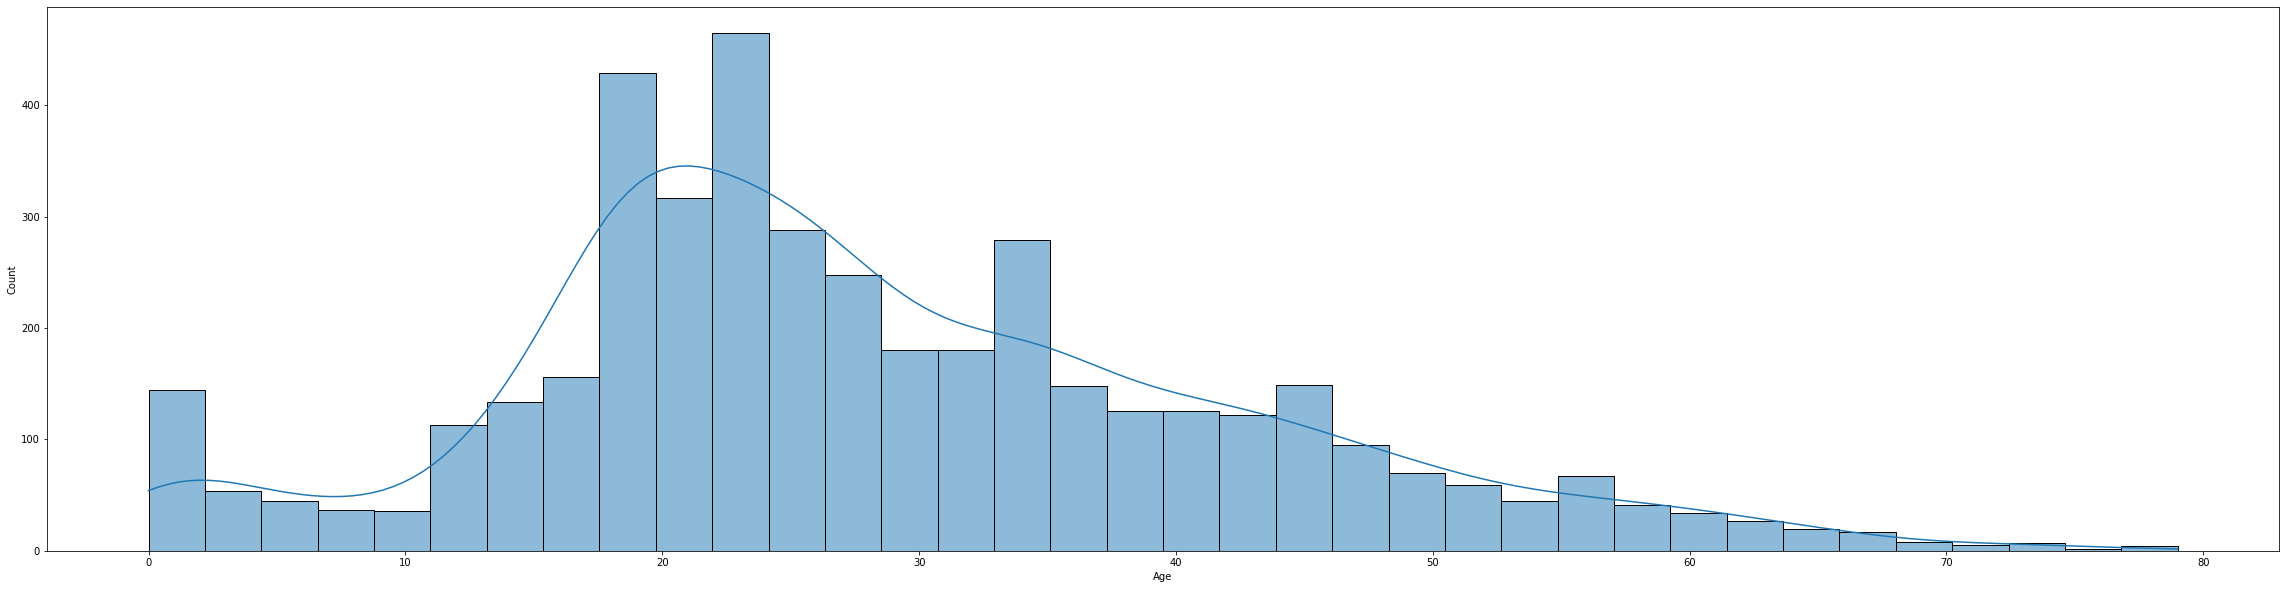

In [515]:
sns.histplot(df_X_testSet_fillNan.Age,kde=True)

In [516]:
# Categorizing Age into 4 Categories
# Baby/Toddler: (0,3], 0 is excluded & 3 is included
# Child: (3,17], 3 is excluded & 17 is included
# Adult: (17,63], 17 is excluded & 63 is included
# Elderly: (63,99], 63 is excluded & 99 is included
df_X_testSet_fillNan['Age'] = pd.cut(x=df_X_testSet_fillNan['Age'], bins=[0, 3, 17, 63, 99],
                     labels=['Baby/Toddler', 'Child', 'Adult',
                             'Elderly'])
df_X_testSet_fillNan

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupPassengerId
0,0013,Earth,True,TRAPPIST-1e,Adult,False,0.0,0.0,0.0,0.0,0.0,01
1,0018,Earth,False,TRAPPIST-1e,Adult,False,0.0,9.0,0.0,2823.0,0.0,01
2,0019,Europa,True,55 Cancri e,Adult,False,0.0,0.0,0.0,0.0,0.0,01
3,0021,Europa,False,TRAPPIST-1e,Adult,False,0.0,6652.0,0.0,181.0,585.0,01
4,0023,Earth,False,TRAPPIST-1e,Adult,False,10.0,0.0,635.0,0.0,0.0,01
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266,Earth,True,TRAPPIST-1e,Adult,False,0.0,0.0,0.0,0.0,0.0,02
4273,9269,Earth,False,TRAPPIST-1e,Adult,False,0.0,847.0,17.0,10.0,144.0,01
4274,9271,Mars,True,55 Cancri e,Adult,False,0.0,0.0,0.0,0.0,0.0,01
4275,9273,Europa,False,TRAPPIST-1e,Adult,False,0.0,2680.0,0.0,0.0,523.0,01


In [517]:
df_X_testSet_fillNan.Age = df_X_testSet_fillNan.Age.fillna(df_X_testSet_fillNan.Age.mode().iloc[0])
df_X_testSet_fillNan.Age.isna().sum()

0

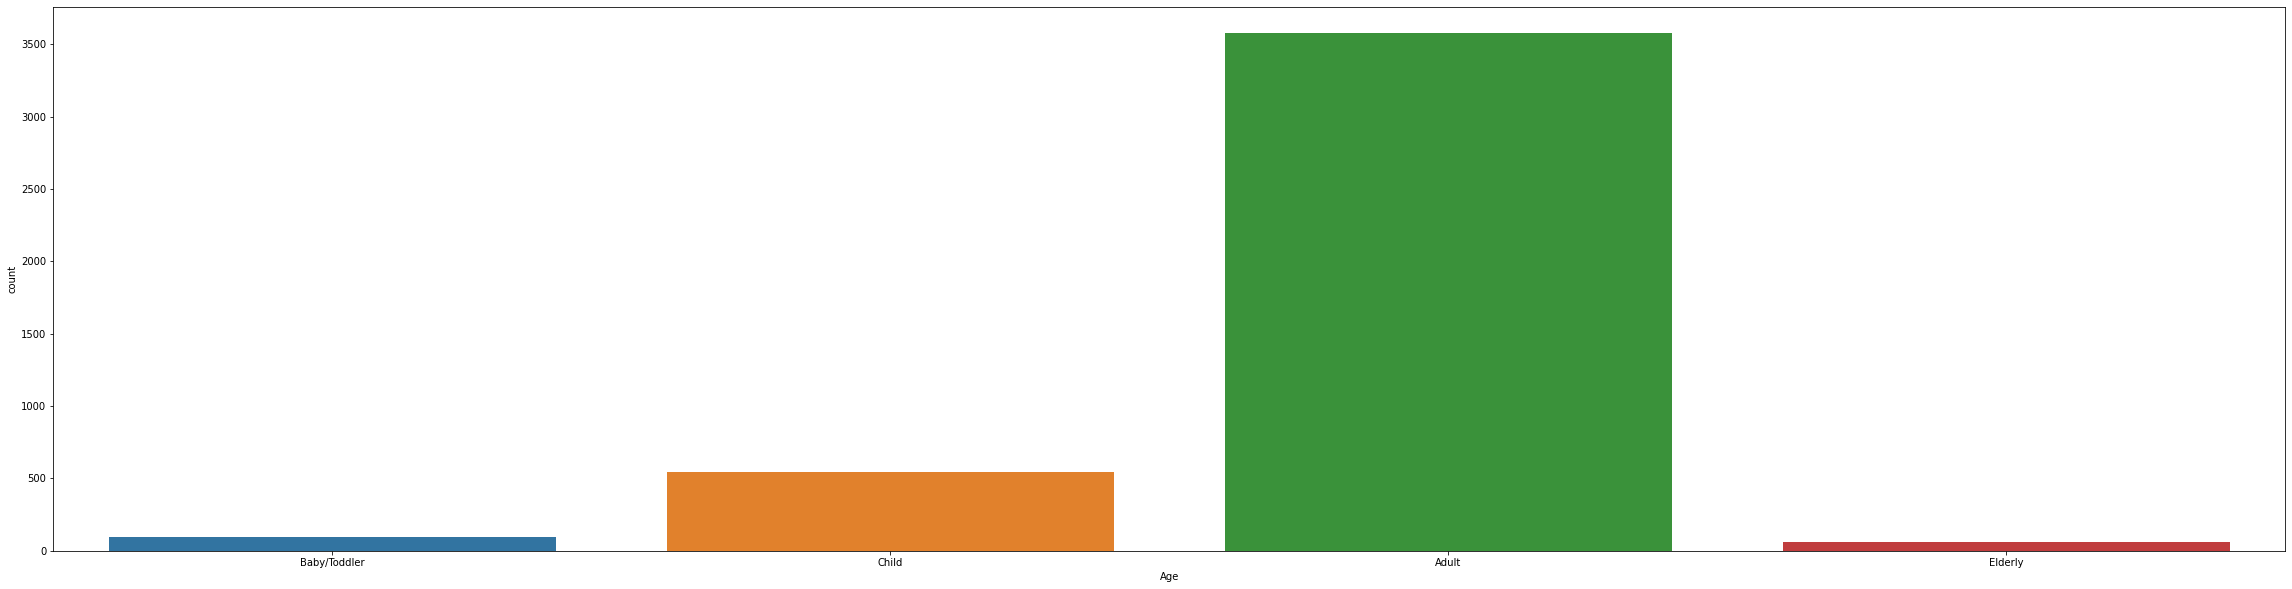

In [518]:
sns.countplot(df_X_testSet_fillNan['Age'])

In [519]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_X_testSet_fillNan['HomePlanet'] = le.fit_transform(df_X_testSet_fillNan['HomePlanet'])
df_X_testSet_fillNan['CryoSleep'] = le.fit_transform(df_X_testSet_fillNan['CryoSleep'])
df_X_testSet_fillNan['Destination'] = le.fit_transform(df_X_testSet_fillNan['Destination'])
df_X_testSet_fillNan['VIP'] = le.fit_transform(df_X_testSet_fillNan['VIP'])
df_X_testSet_fillNan['Age'] = le.fit_transform(df_X_testSet_fillNan['Age'])
df_X_testSet_fillNan['PassengerId'] = le.fit_transform(df_X_testSet_fillNan['PassengerId'])
df_X_testSet_fillNan['GroupPassengerId'] = le.fit_transform(df_X_testSet_fillNan['GroupPassengerId'])
df_X_testSet_fillNan.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupPassengerId
0,0,0,1,2,0,0,0.0,0.0,0.0,0.0,0.0,0
1,1,0,0,2,0,0,0.0,9.0,0.0,2823.0,0.0,0
2,2,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0
3,3,1,0,2,0,0,0.0,6652.0,0.0,181.0,585.0,0
4,4,0,0,2,0,0,10.0,0.0,635.0,0.0,0.0,0


# spliting data

In [520]:
y = df_trainSet_fillNan['Transported']
X = df_trainSet_fillNan.drop('Transported',axis=1)
X

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupPassengerId
0,0,1,0,2,0,0,0.0,0.0,0.0,0.0,0.0,0
1,1,0,0,2,0,0,109.0,9.0,25.0,549.0,44.0,0
2,2,1,0,2,0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,2,1,0,2,0,0,0.0,1283.0,371.0,3329.0,193.0,1
4,3,0,0,2,2,0,303.0,70.0,151.0,565.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,6213,1,0,0,0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,6214,0,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0
8690,6215,0,0,2,0,0,0.0,0.0,1872.0,1.0,0.0,0
8691,6216,1,0,0,0,0,0.0,1049.0,0.0,353.0,3235.0,0


In [521]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [522]:
X_train.shape

(6954, 12)

In [523]:
X_test.shape

(1739, 12)

In [524]:
y_train.shape

(6954,)

In [525]:
y_test.shape

(1739,)

# Scaling

In [527]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaling = scaler.fit_transform(X_train)
X_test_Scaling = scaler.transform(X_test)
X_testSetScaling = scaler.transform(df_X_testSet_fillNan)

# Modeling : Multi-Layer Perceptron Neural Network(MLP)

In [439]:
model = tfa.keras.Sequential()
# add the input layer
input =  tfa.keras.layers.Input(shape=(X_train.shape[1],))
model.add(input)
# add the hidden layer
model.add(tfa.keras.layers.Dense(128, activation='relu')) 
model.add(tfa.keras.layers.Dense(128, activation='relu')) 
# add the output layer 
model.add(tfa.keras.layers.Dense(1, activation='sigmoid')) 
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [440]:
# fit the model 
history = model.fit(x= X_train_scaling,y = y_train,epochs=500, batch_size=128, verbose=2)

Epoch 1/500
55/55 - 1s - loss: 0.5280 - accuracy: 0.7482 - 1s/epoch - 21ms/step
Epoch 2/500
55/55 - 0s - loss: 0.4538 - accuracy: 0.7846 - 203ms/epoch - 4ms/step
Epoch 3/500
55/55 - 0s - loss: 0.4416 - accuracy: 0.7938 - 169ms/epoch - 3ms/step
Epoch 4/500
55/55 - 0s - loss: 0.4358 - accuracy: 0.7921 - 193ms/epoch - 4ms/step
Epoch 5/500
55/55 - 0s - loss: 0.4297 - accuracy: 0.7958 - 213ms/epoch - 4ms/step
Epoch 6/500
55/55 - 0s - loss: 0.4261 - accuracy: 0.7982 - 177ms/epoch - 3ms/step
Epoch 7/500
55/55 - 0s - loss: 0.4225 - accuracy: 0.7985 - 189ms/epoch - 3ms/step
Epoch 8/500
55/55 - 0s - loss: 0.4205 - accuracy: 0.8017 - 236ms/epoch - 4ms/step
Epoch 9/500
55/55 - 0s - loss: 0.4205 - accuracy: 0.7981 - 213ms/epoch - 4ms/step
Epoch 10/500
55/55 - 0s - loss: 0.4188 - accuracy: 0.8026 - 175ms/epoch - 3ms/step
Epoch 11/500
55/55 - 0s - loss: 0.4166 - accuracy: 0.8018 - 182ms/epoch - 3ms/step
Epoch 12/500
55/55 - 0s - loss: 0.4161 - accuracy: 0.8031 - 177ms/epoch - 3ms/step
Epoch 13/500
55

In [441]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               1664      
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 18,305
Trainable params: 18,305
Non-trainable params: 0
_________________________________________________________________


# Model evaluation

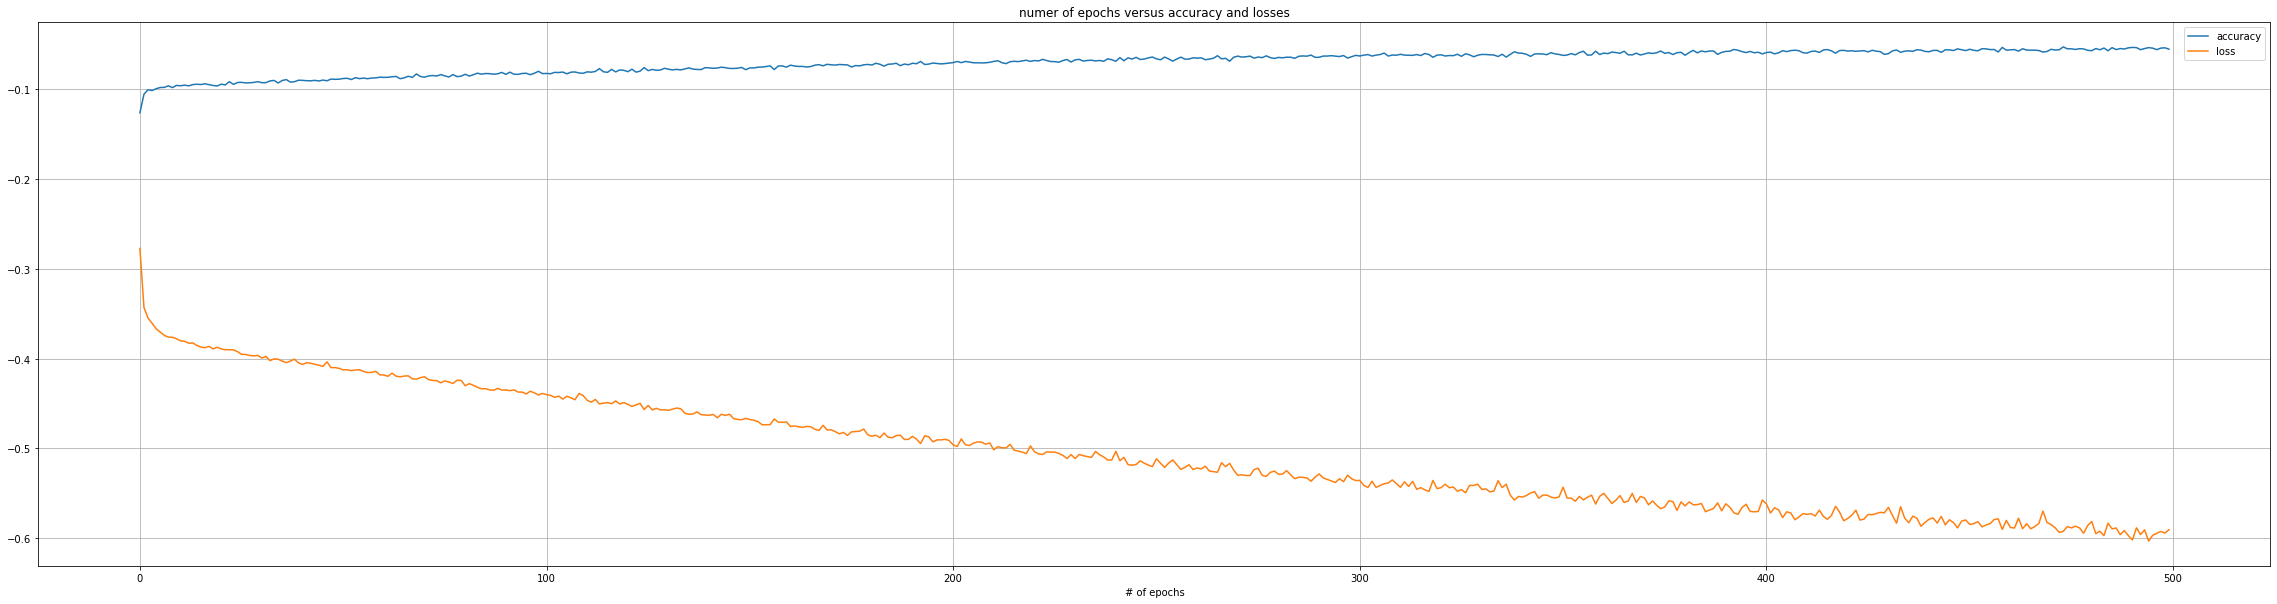

In [442]:
plt.title("numer of epochs versus accuracy and losses")
plt.plot(np.log10(history.history['accuracy']))
plt.plot(np.log10(history.history['loss']))
plt.legend(['accuracy', 'loss'])
plt.xlabel("# of epochs")
plt.grid()

In [443]:
trainAcc = history.history['accuracy'][-1]*100
print(f'train accurracy: {trainAcc}%')

train accurracy: 88.07880282402039%


In [444]:
testAcc = model.evaluate(X_test_Scaling,y_test)[1]*100
print(f'test accurracy: {testAcc}%')

55/55 [==============================] - 0s 2ms/step - loss: 0.7549 - accuracy: 0.7625
test accurracy: 76.25072002410889%


In [445]:
y_pred=model.predict(X_test_Scaling)

In [446]:
con_mat = tfa.math.confusion_matrix(y_test,y_pred).numpy()
con_mat

array([[860,   1],
       [819,  59]], dtype=int32)

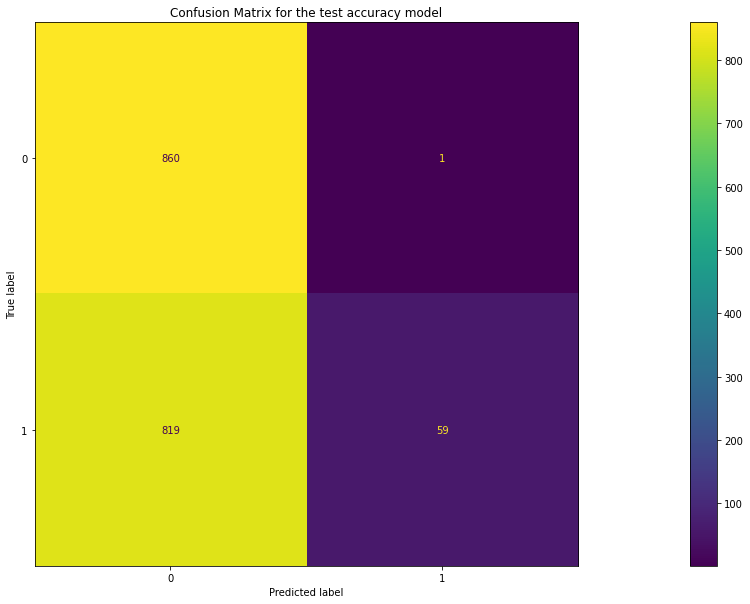

In [447]:
display = ConfusionMatrixDisplay(con_mat).plot()
plt.title(f'Confusion Matrix for the test accuracy model')
plt.show()

# test Model

In [551]:
y_pedTest = model.predict(df_X_testSet_fillNan)
y_pedTest = np.round(y_pedTest)
y_pedTest

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [552]:
ytest = le.fit_transform(df_ytestSet['Transported'])

In [553]:
con_mat = tfa.math.confusion_matrix(ytest,y_pedTest).numpy()
con_mat

array([[1887, 2390],
       [   0,    0]], dtype=int32)

In [555]:
Df_submission = pd.DataFrame()
Df_submission["PassengerId"] = df_ytestSet['PassengerId']
Df_submission['Transported'] = [False if y == 0 else True for y in y_pedTest]
Df_submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [556]:
Df_submission.to_csv('sample_submission.csv', index=False)